In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# analyse student data from csv file "Student_Performance.csv" and drop duplicate rowss
df= pd.read_csv("Student_Performance.csv")



In [13]:
df.head


<bound method NDFrame.head of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sam

In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(127)

In [9]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#rename column names for to have _ instead of spaces
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


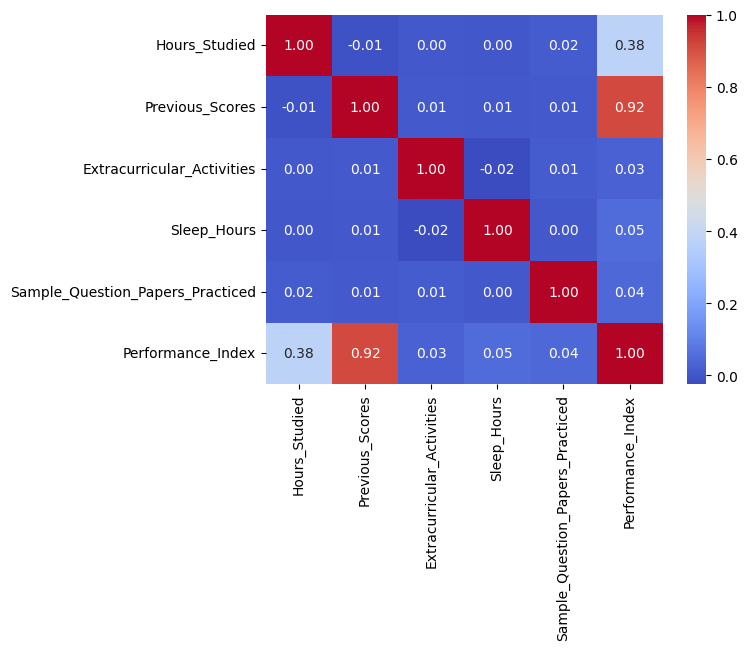

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show() 

In [26]:
X  = df['Previous_Scores']
y = df['Performance_Index']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:

lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_prod = lr.predict(X_test.values.reshape(-1, 1))

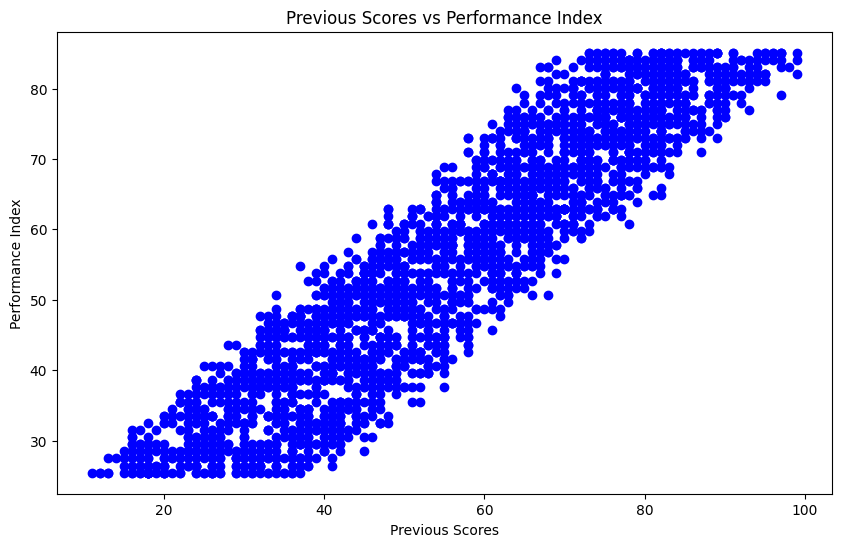

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_prod, color='blue', label='Actual Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.show()